In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


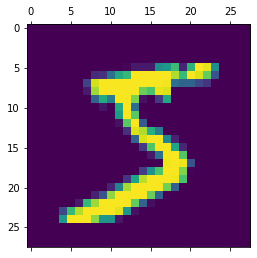

In [17]:
plt.matshow(X_train[0])

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
X_train.shape
X_train_flatened = X_train.reshape(len(X_train), 28*28)
X_test_flatened = X_test.reshape(len(X_test), 28*28)
X_train_flatened.shape
X_test_flatened.shape

(10000, 784)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics =['accuracy']
)

model.fit(X_train_flatened, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7296 - accuracy: 0.8051
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3090 - accuracy: 0.9134
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2824 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.9256
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2672 - accuracy: 0.9256


In [37]:
model.evaluate(X_test_flatened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2668 - accuracy: 0.9244


[0.26683923602104187, 0.9243999719619751]

In [39]:
y_pred = model.predict(X_test_flatened)


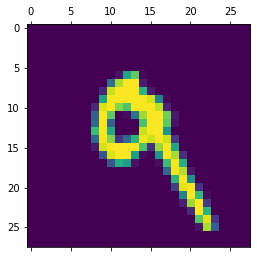

In [41]:
plt.matshow(X_test[7])

In [43]:
np.argmax(y_pred[7])

9

In [51]:
y_predict_labels = [np.argmax(i)for i in y_pred]
y_predict_labels[:5]
cm = tf.math.confusion_matrix(y_test, y_predict_labels)
print(cm)

tf.Tensor(
[[ 965    0    1    2    0    5    4    2    1    0]
 [   0 1112    2    2    0    1    4    2   12    0]
 [   7   12  912   20    7    5   11   11   44    3]
 [   2    0   16  934    0   19    2   12   18    7]
 [   2    1    6    2  914    0    7    6   10   34]
 [   9    3    3   42   11  767   11    8   32    6]
 [  14    3    8    1    8   15  905    2    2    0]
 [   1    5   20    7    8    0    0  958    3   26]
 [   6    8    5   26    9   24    8   14  868    6]
 [  11    7    1   12   26    5    0   33    5  909]], shape=(10, 10), dtype=int32)
